In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "background: black; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

In [3]:
# RUN THIS CELL
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import time

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [5 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [20 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [50 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [30 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [10 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [5 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices. 

All of the variables are quantitative as each variable is represented by an int or float. Additionally, each variable could easily be modelied on a scatterplot

In [5]:
path = "./data/car_dekho_full.csv" #./ for current dir
car_dekho = pd.read_csv(path)

car_dekho.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

Each predictor looks like it has some correlation with the response variable. However, MRP shows the strongest trend, which suggests that it will best predict Current_Selling_Price due to it having the lowest variance among the three plots by far.

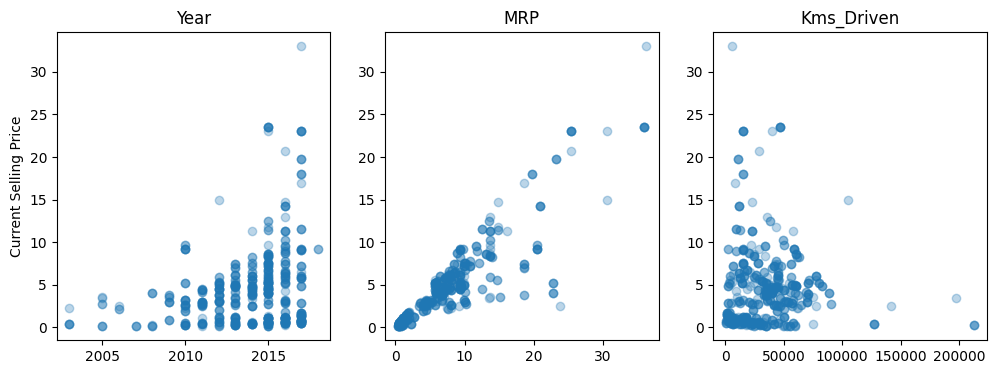

In [6]:
response = car_dekho['Current_Selling_Price']
features = car_dekho.drop(columns=['Current_Selling_Price'])

#scatterplot of each feature vs response
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].set_ylabel('Current Selling Price')
for i, feature in enumerate(features.columns):
    axs[i].scatter(features[feature], response, alpha=0.3)
    axs[i].set_title(feature)
plt.show()

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [20 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.25, random_state=109)

In [8]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

In [9]:
X_train.head() #visualize output

,Year,MRP,Kms_Driven
433,2016,8.50,15059
156,2014,14.00,63000
501,2016,3.95,25000
356,2015,13.09,60076
357,2015,13.09,60076


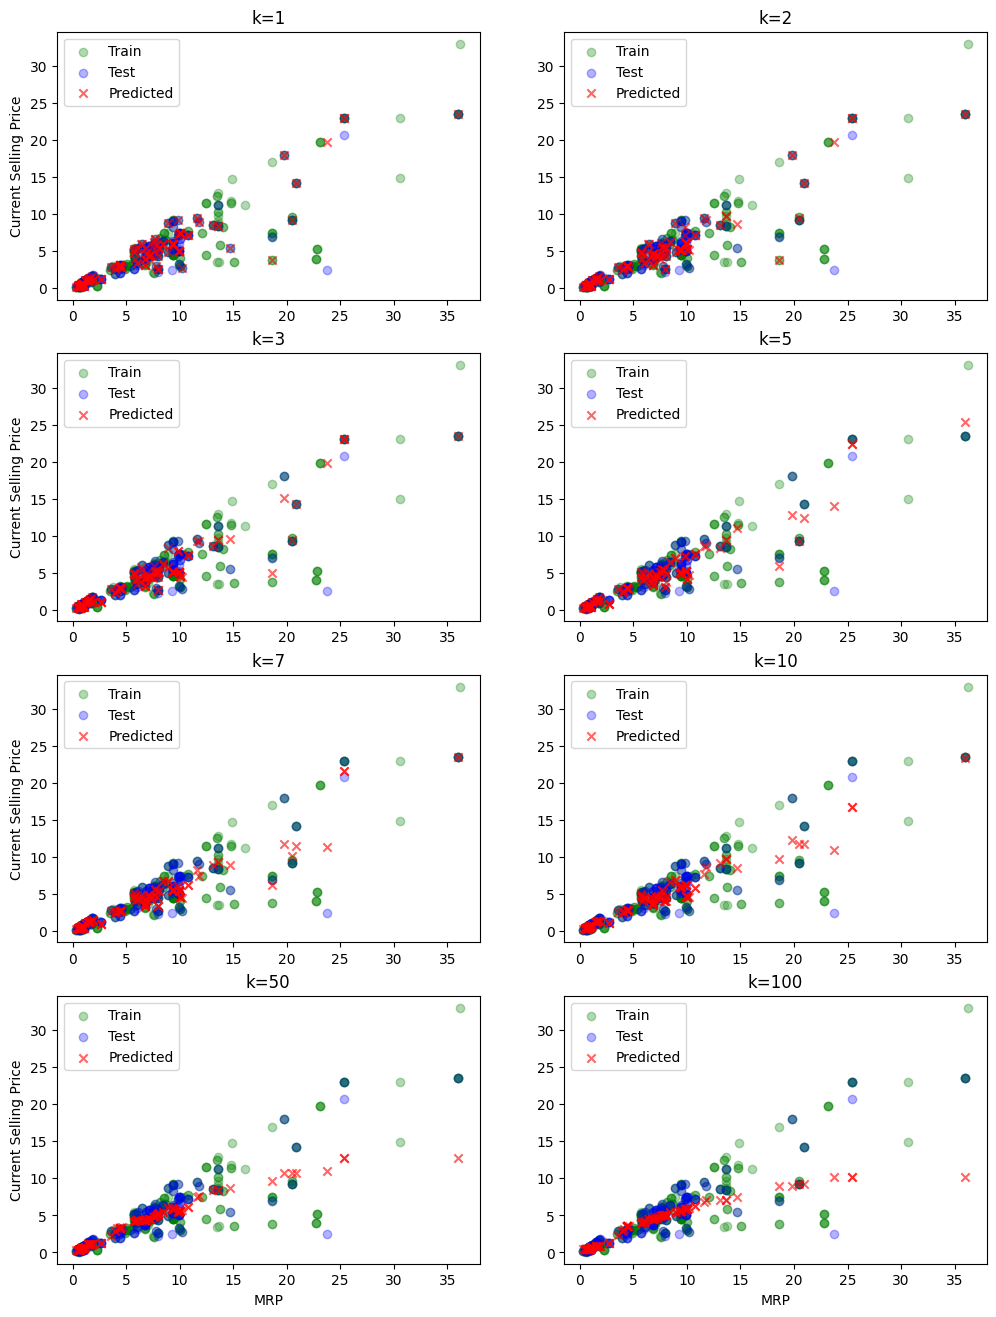

In [10]:
ks = [1,2,3,5,7,10,50,100] # list of k values

fig, ax = plt.subplots(4, 2, figsize=(12, 16))
ax = ax.ravel()  # flatten values like Chris said to do

X_train_knn = X_train['MRP'].values.reshape(-1, 1)
X_test_knn = X_test['MRP'].values.reshape(-1, 1)

for i, k in enumerate(ks):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_knn, y_train)
    y_pred = knn.predict(X_test_knn)
    ax[i].scatter(X_train_knn, y_train, alpha=0.3, label='Train', color='green')
    ax[i].scatter(X_test_knn, y_test, alpha=0.3, label='Test', color='blue')
    ax[i].scatter(X_test_knn, y_pred, alpha=0.6, label='Predicted', color='red', marker='x')
    ax[i].set_title(f"k={k}")
    ax[i].legend()
    if i % 2 == 0:
        ax[i].set_ylabel('Current Selling Price')
    if i >= 6:
        ax[i].set_xlabel('MRP')

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

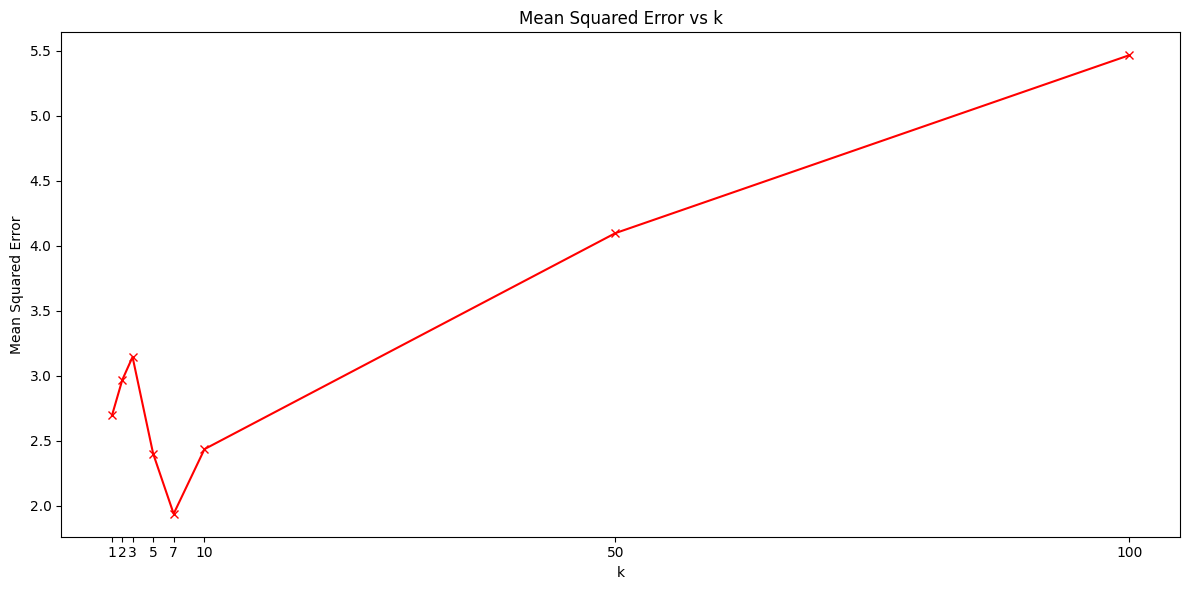

In [11]:
#grab MSE for each k in list

mean_squared_errors = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_knn, y_train)
    y_pred = knn.predict(X_test_knn)
    mean_squared_errors.append(mean_squared_error(y_test, y_pred))

#plot MSE vs k
plt.figure(figsize=(12, 6))
plt.plot(ks, mean_squared_errors, marker='x', color = 'red')
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs k')
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

In [12]:
best_k = ks[np.argmin(mean_squared_errors)] #grab index of k with lowest MSE
best_mse = np.min(mean_squared_errors)

In [13]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 1.940.


In [14]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

In [15]:
best_r2 = r2_score(y_test, y_pred)

In [16]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.6608.


In [17]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

In [18]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression()
linreg.fit(X_train_knn, y_train) #use same tts

LinearRegression()

In [19]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

In [20]:
# your code here
slope = linreg.coef_[0]
intercept = linreg.intercept_

In [21]:
print(
    f"Intercept of the fitted linear model\t\t{intercept:.4f}\n"
    f"Slope of the fitted linear model\t{slope:.4f}"
)

Intercept of the fitted linear model		0.1124
Slope of the fitted linear model	0.6157


In [22]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

In [23]:
#Compute the MSE of the model
lin_train_mse = mean_squared_error(y_train, linreg.predict(X_train_knn))
lin_test_mse = mean_squared_error(y_test, linreg.predict(X_test_knn))
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, linreg.predict(X_test_knn))

In [24]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [25]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Create the following 3 plots:
- Plot the **regression line** along with the **training data**.
- Plot the **residuals** of the model on the **training** set as a function of the **predictor** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a the **distribution** of the **residuals** on the **training** set.

As always, your plots should be well-labeled.

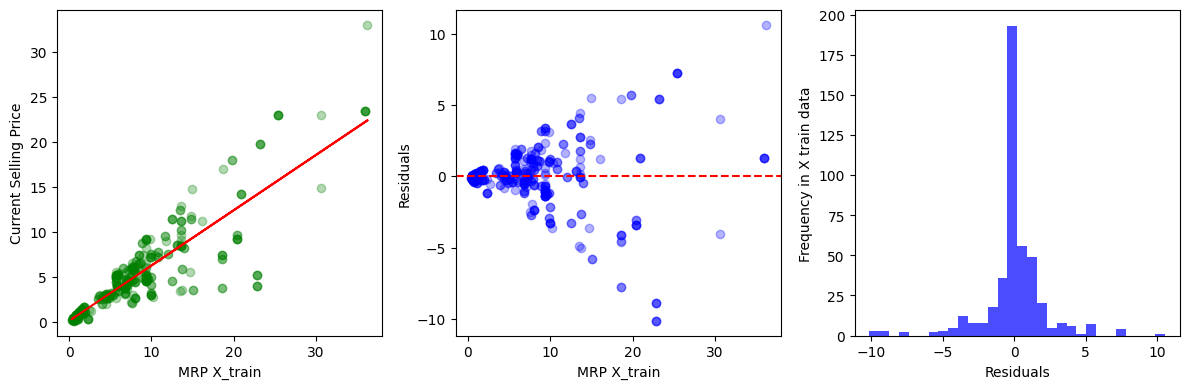

In [26]:
# get residuals
residuals = y_train - linreg.predict(X_train_knn)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(X_train_knn, y_train, alpha=0.3, label='Train', color='green')
axs[0].plot(X_train_knn, linreg.predict(X_train_knn), color='red', label='Regression Line') #prediction of train is regression line
axs[0].set_xlabel('MRP X_train')
axs[0].set_ylabel('Current Selling Price')
axs[1].scatter(X_train_knn, residuals, alpha=0.3, color='blue')
axs[1].axhline(0, color='red', linestyle='--', label='zero residual value') #add 0 line
axs[1].set_xlabel('MRP X_train')
axs[1].set_ylabel('Residuals')
axs[2].hist(residuals, bins=30, color='blue', alpha=0.7)
axs[2].set_xlabel('Residuals')
axs[2].set_ylabel('Frequency in X train data')

plt.tight_layout()


<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

A linear regression model makes four important assumptions. For each assumption, describe how one or more of the plots in the previous question may provide evidence that (1) the assumption holds, (2) that the assumption is violated, or (3) that none of the plots have any bearing on the assumption. 

**Note:** Don't over-think this question! You are just being asked to use the plots above to check the four assumptions and to explain your reasoning.

For plot 1, the independent and dependent variables show a proportional relationship, providing evidence that (1) assumption of Linearity holds. For plot 2, the residuals show clear heteroscedasticity, showing that (2) - the assumption of homoscedasticity among residuals is violated. Plot 3 shows that the residuals appear to be normally distributed, providing evidence that (1) assumption of normality among residuals holds. Lastly, (3) no plots provide clear evidence that the assumption of independence among residuals is violated or held; we could make an assumption that plot 2 shows no trends in dependence among residuals, but the small sample size of datapoints with MRP values greater than 20 makes this assumption hard to determine. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

Based on what you have seen in the preceding questions, which model would you select as the best and why? Might you have any reason to doubt your choice? Why or why not?

**Hint:** There were more than just 2 candidate models.

I would select linear regression as the best model because the model yielded the lower R-squared score and has plenty of room for improvement. The bad news and reason to doubt this model is that the assumption of homodescasticity is clearly violated based on the previous plots. However, a log-transformation could be applied to the dependent and independent variable to reduce the heterodescasticity of the residuals of MRP. Additionally, clear proportional trends were observed in both other feature variables, year and kilometers driven, which can theoretically only improve the R-squared. 

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [50 pts]: Analysis of 2024 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2024 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [30 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and/or simple statistics. Your goal should be to communicate your findings clearly. So be sure to provide an interpretation with your visualizations or other output.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

There is a clear disparity in income of participants by gender as shown in the histograms below.

In [27]:
path = './data/census_data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
0,0,85,0,0,-1,0,1,0,0,0,0,0,0,0,2,9028.04
1,1,85,0,0,-1,0,1,0,1,1,0,0,0,0,2,23728.07
2,3,53,0,0,-1,0,1,0,0,0,0,0,0,0,2,11747.51
3,4,52,52,42,-1,0,1,0,1,0,0,5,5,0,2,40486.23
4,5,68,0,0,-1,0,0,1,1,0,0,0,0,0,2,9436.61


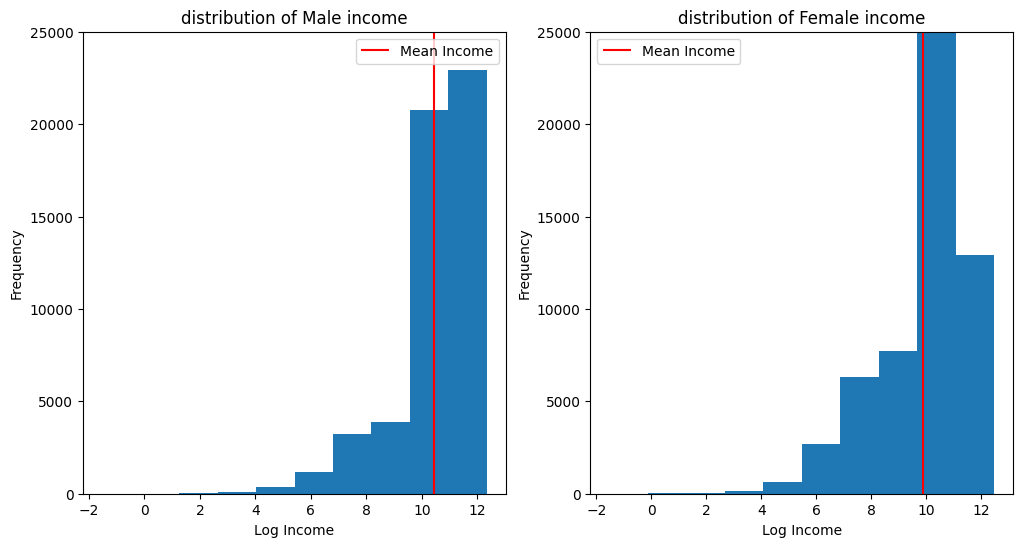

In [28]:
# boolean mask for male and female income
income_M = np.log(df['income'][df['sex'] == 1])
income_F = np.log(df['income'][df['sex'] == 0])
# make double historgram of gender versus income
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].hist(x=income_M)
ax[0].set_title('distribution of Male income')
ax[0].set_ylim(0, 25000)
ax[0].vlines(income_M.mean(), *ax[0].get_ylim(), color='red', label='Mean Income')
ax[0].set_xlabel('Log Income')
ax[0].set_ylabel('Frequency')
ax[0].legend()
ax[1].hist(x=income_F)
ax[1].set_title('distribution of Female income')
ax[1].set_xlabel('Log Income')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, 25000)
ax[1].vlines(income_F.mean(), *ax[1].get_ylim(), color='red', label='Mean Income')
ax[1].legend()



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order. 

Yes, the violinplot below shows a clear positive relationship between education and income level. Additionally, the trend is similar across both genders as shown by the barplot created with pandas groupby(). Although, this barplot also shows the clear difference in income by gender at each level of education. Finally, retaining the numerical ordering in the dataset is useful as clear trends are evident with the ordering of the dataset. A categorical variable lacking order could not be multiplied by a coefficient at each level as it would have to be one-hot-encoded into multiple binary categories to be used in regression, which would could significantly lose predictive value in this case.

Text(0.5, 1.0, 'Income versus Education Level')

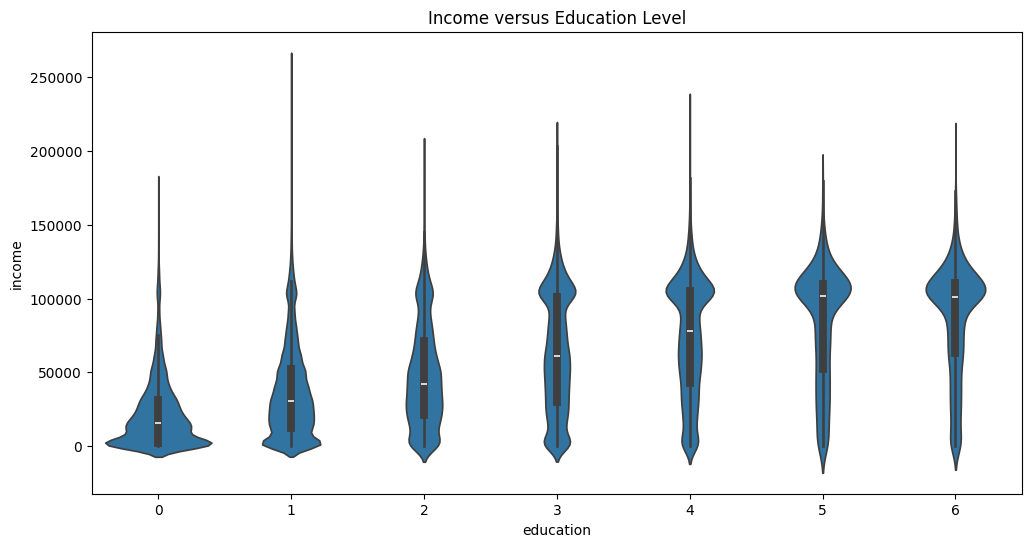

In [29]:
# plot income versus education level
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.violinplot(y='income', x='education', data=df,ax=ax)
plt.title('Income versus Education Level')

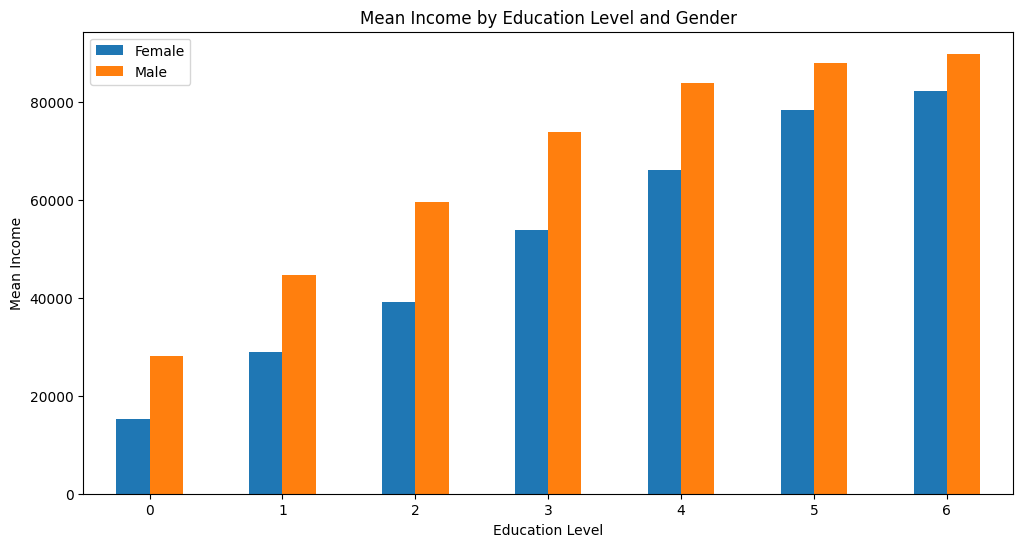

In [30]:
# Group by education and sex and get income
grouped_df = df.groupby(['education', 'sex'])['income'].mean().unstack()

# Plot corresponding means for each group
grouped_df.plot(kind='bar', legend=True, figsize=(12,6))
plt.legend(['Female', 'Male'])
plt.ylabel('Mean Income')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.title('Mean Income by Education Level and Gender')
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Is there a clear trend between age and income?

yes, middle-aged people make the most, but people make less money as they get older and retire.

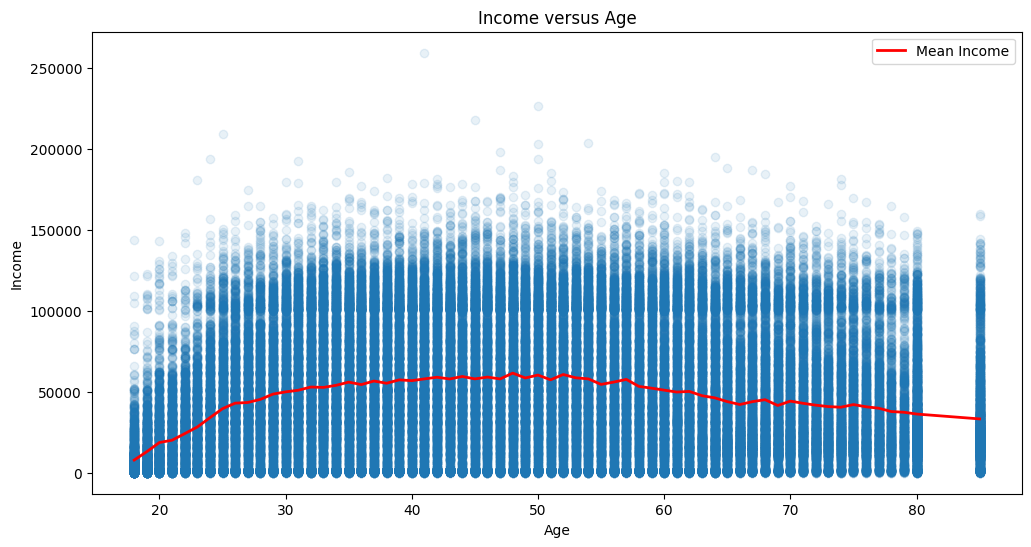

In [31]:
#get mean of income for each age
grouped_df = df.groupby('age')['income'].mean()

fig,ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(df['age'], df['income'], alpha=0.1)
ax.plot(grouped_df, color='red', label='Mean Income', linewidth=2)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_title('Income versus Age')
ax.legend()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

All four of the quantitative variables show a relationship with income. From the visualization below, the relationships appear to be linear. Although, many data are represented with a 0 for hourly_pay, hours_per_week, and weeks_worked, which could skew some of the linear trends. For instance, the regression line output from sns regplot is clearly skewed by the noisy data with 0 hourly pay in the first plot. Nonetheless, I believe that all quantitative features show a linear relationship with income with necessary data cleaning and with age evidently having a polynomial relationship.

Text(0.5, 1.0, 'Income versus Weeks Worked')

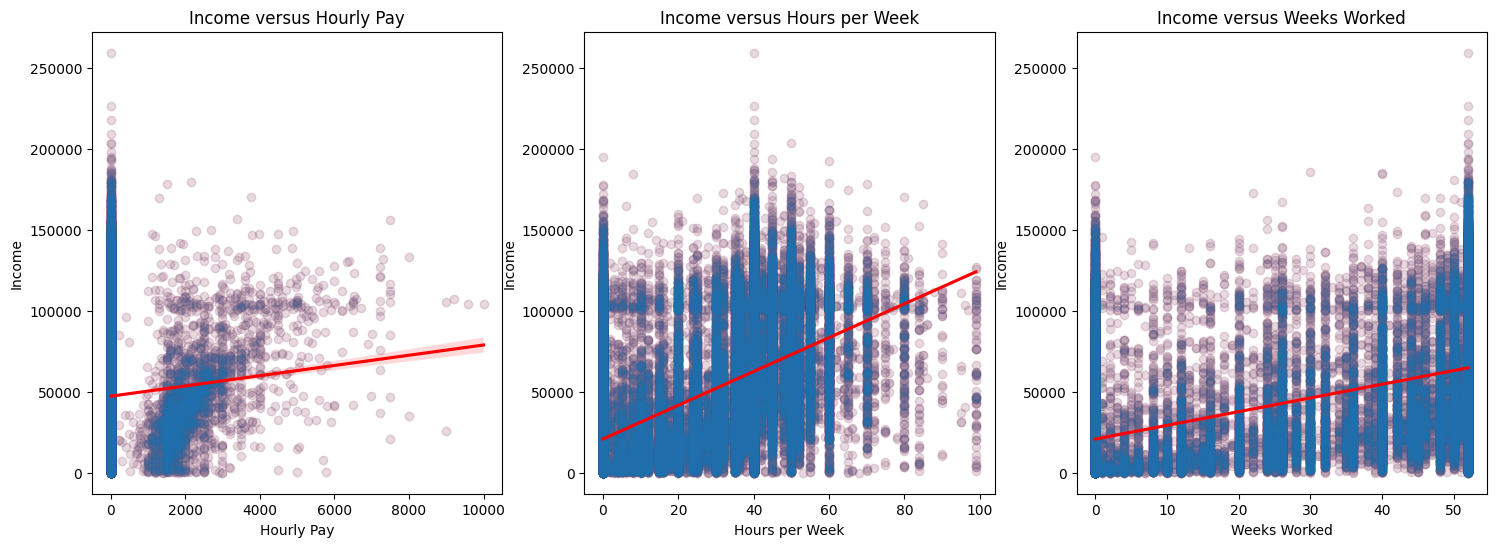

In [32]:
# already visualized relationship between age and income

'''Other quantitative variables:
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year'''


#make plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.regplot(x='hourly_pay', y='income', data=df, ax=ax[0], scatter_kws={'alpha':0.1}, color='red')
ax[0].scatter(df['hourly_pay'], df['income'], alpha=0.1)
ax[0].set_xlabel('Hourly Pay')
ax[0].set_ylabel('Income')
ax[0].set_title('Income versus Hourly Pay')

sns.regplot(x='hours_per_week', y='income', data=df, ax=ax[1], scatter_kws={'alpha':0.1}, color='red')
ax[1].scatter(df['hours_per_week'], df['income'], alpha=0.1)
ax[1].set_xlabel('Hours per Week')
ax[1].set_ylabel('Income')
ax[1].set_title('Income versus Hours per Week')

sns.regplot(x='weeks_worked', y='income', data=df, ax=ax[2], scatter_kws={'alpha':0.1}, color='red')
ax[2].scatter(df['weeks_worked'], df['income'], alpha=0.1)
ax[2].set_xlabel('Weeks Worked')
ax[2].set_ylabel('Income')
ax[2].set_title('Income versus Weeks Worked')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

What is the average effect of the `military_service` variable on income?

On average, people who serve in the military earn roughly $10,000 more than people who do not serve.

Text(0.5, 1.0, 'Mean Income by Military Service')

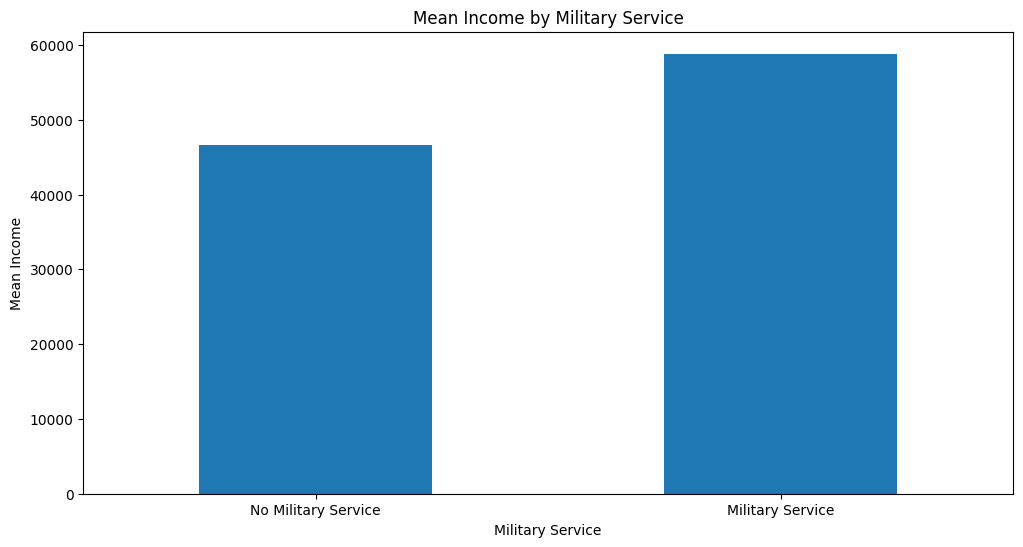

In [33]:
#only plot averages

grouped_df = df.groupby('military_service')['income'].mean()
grouped_df.plot(kind='bar', legend=False, figsize=(12,6))
plt.ylabel('Mean Income')
plt.xlabel('Military Service')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['No Military Service', 'Military Service'])
plt.title('Mean Income by Military Service')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Propose a question of your own that you would like to explore in the data. Create a visualization to help you answer this question and provide an interpretation of your findings.

How does race affect earnings, both on average and the variance?

The plot below shows that in the US, race does affect both averages and variance in income. Interestingly, the lowest-income group, American Indian, Alaskan native, or native Hawaiian, has both the lowest average and variance. On the other hand, the highest average income group, Black-Asian, has both the highest average and variance.

Text(0.5, 1.0, 'Income versus Race')

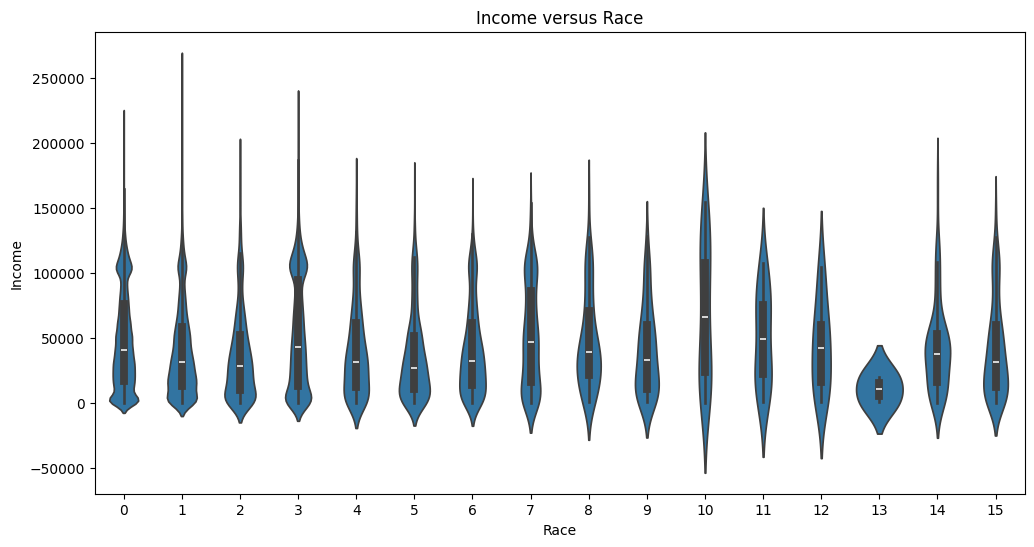

In [34]:
# Plot race versus income
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='race', y='income', data=df, ax=ax)

ax.set_xlabel('Race')
ax.set_ylabel('Income')
ax.set_title('Income versus Race')

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

In [35]:
# your code here
n = df.shape[0]
gini_coef = 0.0

#stepwise add indices i , incomes x_i in numerator
sorted_incomes = df['income'].sort_values()
for i,xi in enumerate(sorted_incomes):
    gini_coef += (2*(i+1) - n - 1)*xi #i+1 since python index starts at 0

#divide by denominator
gini_coef = gini_coef / (n * sorted_incomes.sum())

In [36]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.448


In [37]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

My calculated gini coefficient is 0.04 higher than the world bank estimate, making my estimate biased towards income inequality. The self-report nature could have contributed to a biased result as some rich people may have entered a higher income than they actually have, thus skewing the gini more towards 1. Additionally, more modest people may be more modest about their earnings, further amplifying the self-reporting bias. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [10 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

> **Note**: The rubric below is provided for transparency. Please ensure your responses are genuine and thoughtful, rather than simply attempting to "fit" the rubric.
---
<details>
<summary><b>Click to view the Q6 Critique Rubric</b></summary>
    
### Q6 Critique Rubric:

**Total Points: 10**

#### 1. Relevance of Comments (4 points):
- **4 points**: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.
- **3 points**: The critique references multiple sections of the notebook with some specificity.
- **2 points**: The critique generally addresses the notebook but may lack specific references to steps or sections.
- **1 point**: The critique provides only a cursory overview without specific details.
- **0 points**: The critique does not address the preprocessing notebook.

#### 2. Depth of Analysis (4 points):
- **4 points**: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.
- **3 points**: The student provides valuable feedback for one section or multiple but less detailed feedback for several sections.
- **2 points**: The analysis is somewhat detailed but may lack depth or actionable feedback.
- **1 point**: The feedback is generic or surface-level.
- **0 points**: No meaningful analysis provided.

#### 3. Clarity and Organization (2 points):
- **2 points**: The critique is well-organized, clear, and easy to follow.
- **1 point**: The critique is somewhat organized but may have unclear sections.
- **0 points**: The critique is disorganized or difficult to understand.

---

Remember to provide specific examples or suggestions whenever possible. General statements without backing evidence or examples will not be as valuable as those with clear references and reasoning.

</details>


I believe that a better way to simulate a continuous response for the income brackets would be more research on the exponential distribution of the 'filthy rich' tail. For instance, the variance term, scale, was set to 2.5 with no explanation. Surely, there are data that exist that directly determine or can be used to determine a more precise estimate of the variance of this exponential distribution.

Additionally, the preprocessing steps used to reduce the unique number of categorical variables are viable for some variables, but not others. For example, the ordination of the predictor 'education' makes sense as there is an inherent order to the level of education that models can use to predict the target variable: income. However, other variables definitely should not have an order, and could create model bias. We have previously discussed in class that we should be extremely careful when assigning an order to categories like 'race'. As follows, if this were my preprocessing code, I would heavily consider one-hot encoding race into multiple categorical variables. Although this would increase the number of unique categorical variables, that would be worth the trade-off of increasing model readability and accuracy while removing associated bias from assigning an order to the race variable. 

Lastly, while education retains a rather simple ordinal structure, I would do more research and perhaps alter the order of variables like 'industry' and 'occupation' to assign a sensical order that forms a positive correlation with income. For example, the 'management, business, and financial occ' category within the 'occupation' variable is assigned to level 0: the lowest level. Intuitively, managers typically earn a high salary, so I would consider putting that category at the highest level and assign less lucrative occupations to the lower levels, perhaps combining categories like 'professional and related occ' and 'service occ' that earn a similar income to reduce redundancy. Using this approach, models like multiple linear regression would have an easier time training on predictor variables to most accurately predict the target variable.

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

I found the gini coefficient to be a bit challenging to understand conceptually, but that was mainly due to lack of familiarity with the concept. I found question 6 a bit difficult to answer because of the many variables associated with census data. However, I enjoyed the intellectual challenge of hypothetically augmenting the code as that helped me grasp concepts like one-hot encoding that we previously discussed in class.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

In [38]:
hours_spent_on_hw = 6

In [39]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [40]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 0.57 minutes for this notebook to run


🌈 **This concludes HW2. Thank you!**

[Return to contents](#contents)